# Proyek Analisis Data : Bike Sharing Datase
- **Nama :** Rahmat Amalul Ahlin
- **Email :** rahmatmulyan@gmail.com
- **ID Dicoding :** rahmat_amalul

## Menentukan Pertanyaan Bisnis

- Musim apa yang memiliki paling banyak rentail bike, baik tahun 2011 maupun 2012?
- Pada jam / pukul berapa yang tercatat paling banyak User bike sharing setiap harinya di tahun 2012?
- Bagaimana catatan user registered bike sharing per bulan pada tahun 2012?
- Bagaimana minat user terhadap rental sepeda jika dilihat dari faktor suhu dan kelembapan?

## Import Semua Packages / Library yang Digunakan

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime 


## Data Wrangling

### Gathering Data

In [4]:
# Day DataFrame
day_df = pd.read_csv('./data/day.csv')
print(day_df.head(5))
# Hour DataFrame
hour_df = pd.read_csv('./data/hour.csv')
print(hour_df.head(5))

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

**Insight**
- Data day.csv memiliki kolom kolom yang berisi data hari, tanggal, bulan, tahun, serta musim yang ada pada tahun 2011 dan 2012
- Selain itu terdapat juga kolom untuk data cuaca, temperatur, kelembapan, dan kecepatan angin setiap harinya pada tahun 2011 dan 2012
- Untuk data hour.csv menyertakan kolom tambahan yaitu kolom 'hr' untuk lebih menspesifikan keadaan setiap harinya berdasarkan waktu / jam pada hari tersebut

### Assessing Data

#### Menilai tabel `day_df`

In [5]:
# Melihat detail informasi day_df
day_df_info = day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Deskripsi Kolom `day_df`
`instant` = Record untuk Indeks  
`dteday` = Tanggal sewa  
`season` = Musim sewa  
- Springer = 1
- Summer = 2
- Fall = 3
- Winter = 4

`yr` = Tahun sewa
- 2011 = 0
- 2012 = 1

`mnth` = Bulan sewa ( 1- 12)  
`holiday` = Apakah Hari bercuaca hari libur atau bukan  
`weekday` = Hari dalam seminggu (konversi Amerika)  
- Minggu = 0  
.....
- Sabtu = 6

`workingday` = Jika bukan tanggal merah atau libur maka 1  
`weathersit` = Keadaan cuaca
- 1 = Cerah, Sedikit berawan, Terkadang berawan
- 2 = Berawan + Berkabut, Berawan tebal + Berkabut, Sedikit berawan + Berkabut, Berkabut saja
- 3 = Salju ringan, Hujan ringan + Badai petir + Awan menyebar, Hujan ringan + Awan menyebar
- 4 = Hujan deras + Butiran es + Badai Petir + Berkabut, Bersalju + Kabut tebal

`temp` = Nilai suhu (Celcius) dengan Normalisasi, dimana nilai aktual dibagi 41  
`atem = `Nilai suhu yang dirasakan (Celcius) dengan Normalisasi, dimana nilai aktual dibagi 50  
`hum` = Nilai kelembapan dengan Normalisasi, dimana nilai aktual dibagi 100  
`windspeeed` = Nilai kecepatan angin dengan Normalisasi, dimana nilai aktual dibagi 67  
`casual` = Jumlah User yang tidak berlangganan (Unregistered dalam sistem)  
`registered` = Jumlah user yang berlangganan (Registered dalam sistem)  
`cnt` = Jumlah total user dari casual + registered user  

In [6]:
# Cek Missing Values day_df
day_df_missing_val = day_df.isnull().sum()
day_df_missing_val

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Cek Duplikasi day_df
day_df_duplicated = day_df.duplicated().sum()
print(f'Jumlah duplikasi day_df : {day_df_duplicated}')

Jumlah duplikasi day_df : 0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [9]:
# Melihat detail informasi hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Deskripsi Kolom `hour_df`
`instant` = Record untuk Indeks  
`dteday` = Tanggal sewa  
`season` = Musim sewa  
- Springer = 1
- Summer = 2
- Fall = 3
- Winter = 4

`yr` = Tahun sewa
- 2011 = 0
- 2012 = 1

`mnth` = Bulan sewa ( 1- 12)  
`hr` = Total Jam sewa ( 0 23 )  
`holiday` = Apakah Hari bercuaca hari libur atau bukan  
`weekday` = Hari dalam seminggu (konversi Amerika)  
- Minggu = 0  
.....
- Sabtu = 6

`workingday` = Jika bukan tanggal merah atau libur maka 1  
`weathersit` = Keadaan cuaca
- 1 = Cerah, Sedikit berawan, Terkadang berawan
- 2 = Berawan + Berkabut, Berawan tebal + Berkabut, Sedikit berawan + Berkabut, Berkabut saja
- 3 = Salju ringan, Hujan ringan + Badai petir + Awan menyebar, Hujan ringan + Awan menyebar
- 4 = Hujan deras + Butiran es + Badai Petir + Berkabut, Bersalju + Kabut tebal

`temp` = Nilai suhu (Celcius) dengan Normalisasi, dimana nilai aktual dibagi 41  
`atem = `Nilai suhu yang dirasakan (Celcius) dengan Normalisasi, dimana nilai aktual dibagi 50  
`hum` = Nilai kelembapan dengan Normalisasi, dimana nilai aktual dibagi 100  
`windspeeed` = Nilai kecepatan angin dengan Normalisasi, dimana nilai aktual dibagi 67  
`casual` = Jumlah User yang tidak berlangganan (Unregistered dalam sistem)  
`registered` = Jumlah user yang berlangganan (Registered dalam sistem)  
`cnt` = Jumlah total user dari casual + registered user  

In [10]:
# Cek Missing Values hour_df
hour_df_missing_val = hour_df.isnull().sum()
hour_df_missing_val

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# Cek Duplikasi hour_df
hour_df_duplicated = hour_df.duplicated().sum()
print(f'Jumlah Duplikasi hour_df : {hour_df_duplicated}')

Jumlah Duplikasi hour_df : 0


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**
- Dataset day.csv dan hour.csv merupakan dataset yang sudah dibersihkan oleh penyedia. Hal tersebut karena setelah dilakukan assessing data, menunjukan tidak adaumlah missing value dan data duplicate
- Selain itu, beberapa kolom juga sudah dilakukan Normalisasi sehingga nilai beberapa kolom hanya berada pada rentang 0 sampai 1
- Hanya saja ada 1 kolom yang masih berbentuk objek yaitu kolom 'dteday' sehingga perlu dilakukan perubahan tipe data

### Cleaning Data

#### Membersihkan tabel `day_df`

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Memperbaiki tipe data

In [14]:
day_df['dteday'] = pd.to_datetime(day_df.dteday)

In [15]:
# Cek hasil perbaikan tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [16]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Membersihkan tabel `hour_df`

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Memperbaiki tipe data

In [18]:
hour_df['dteday'] = pd.to_datetime(hour_df.dteday)

In [19]:
# Cek hasil perbaikan tipe data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [20]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight**
- Kedua dataset di atas sudah dibersihkan terlebih dahulu oleh penyedia, sehingga tidak terlalu banyak proses Cleaning Data yang dilakukan
- Hanya dilakukan perubahan tipe data pada kolom 'dteday' menggunakan fungsi to_datetime() dari pandas yang mengubah kolom tersebut menjadi bertipe datetime64

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [21]:
# Menambah fitur data 'temp_group' dalam 3 kategori Panas, Sedang, Dingin
day_df['temp_group'] = day_df.temp.apply(lambda x: 'Panas' if x > 0.7 else ('Sedang' if x > 0.4 else 'Dingin'))
print(day_df.temp_group.sample(5))

26     Dingin
316    Sedang
257    Sedang
418    Sedang
97     Dingin
Name: temp_group, dtype: object


In [22]:
# Menambah fitur data 'hum_group' ke dalam 4 kategori Lembab, Sedikit Lembab, Sedikit Kering, dan Kering
day_df['hum_group'] = pd.cut(hour_df.hum, bins=4, labels=['Kering', 'Sedikit Kering', 'Sedikit Lembab' ,'Lembab'])
day_df.hum_group.describe()

count                731
unique                 4
top       Sedikit Lembab
freq                 302
Name: hum_group, dtype: object

In [23]:
# Re-transformasi 'season' dari numeric ke kategori
day_df['season'] = day_df.season.apply(lambda x: 'Semi' if x == 1 else
                                                 'Panas' if x == 2 else
                                                 'Gugur' if x == 3 else
                                                 'Dingin' if x == 4 else
                                                 None)
print(day_df.season.sample(5))

569     Gugur
242     Gugur
405      Semi
668    Dingin
434      Semi
Name: season, dtype: object


In [24]:
# Re-transformasi 'yr' dari numeric ke kategori
day_df['yr'] = day_df.yr.apply(lambda x: '2011' if x == 0 else
                                         '2012' if x == 1 else
                                         None)
print(day_df.yr.sample(5))

378    2012
305    2011
38     2011
264    2011
103    2011
Name: yr, dtype: object


In [25]:
# Re-transformasi 'weekday' dari numeric ke kategori
day_df['weekday'] = day_df.weekday.apply(lambda x: 'Minggu' if x == 0 else
                                                   'Senin' if x == 1 else
                                                   'Selasa' if x == 2 else
                                                   'Rabu' if x == 3 else
                                                   'Kamis' if x == 4 else
                                                   "Jum'at" if x == 5 else
                                                   'Sabtu' if x == 6 else
                                                   None)
print(day_df.weekday.sample(5))

285    Kamis
95      Rabu
245    Sabtu
476    Sabtu
250    Kamis
Name: weekday, dtype: object


In [26]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_group,hum_group
211,212,2011-07-31,Gugur,2011,7,0,Minggu,0,1,0.805833,0.729796,0.480833,0.164813,1524,2778,4302,Panas,Sedikit Kering
226,227,2011-08-15,Gugur,2011,8,0,Senin,1,1,0.665833,0.616167,0.712083,0.208954,775,3563,4338,Sedang,Sedikit Kering
551,552,2012-07-05,Gugur,2012,7,0,Kamis,1,1,0.827500,0.761367,0.457917,0.194029,1405,4836,6241,Panas,Sedikit Lembab
424,425,2012-02-29,Semi,2012,2,0,Rabu,1,2,0.344348,0.348470,0.804783,0.179117,65,1769,1834,Dingin,Sedikit Lembab
383,384,2012-01-19,Semi,2012,1,0,Kamis,1,1,0.190000,0.190038,0.497500,0.220158,130,3162,3292,Dingin,Sedikit Lembab


In [27]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_group,hum_group
count,731.000000,731,731,731,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4
top,NaN,NaN,Gugur,2012,NaN,NaN,Sabtu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sedang,Sedikit Lembab
freq,NaN,NaN,188,366,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,341,302
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,6.519836,0.028728,NaN,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,1.000000,0.000000,NaN,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,4.000000,0.000000,NaN,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,7.000000,0.000000,NaN,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,10.000000,0.000000,NaN,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,12.000000,1.000000,NaN,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


In [28]:
day_df.instant.is_unique

True

In [29]:
day_df.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

In [30]:
day_df.groupby(by=['yr', 'season']).agg({
    'instant' : 'nunique',
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

instant  casual  registered     cnt
yr   season                                     
2011 Dingin       89   52813      273324  326137
     Gugur        94   95450      324200  419650
     Panas        92   77564      269752  347316
     Semi         90   21425      128575  150000
2012 Dingin       89   76969      438507  515476
     Gugur        94  130641      510838  641479
     Panas        92  125958      445315  571273
     Semi         91   39197      282151  321348

In [31]:
day_df.groupby(by=['yr', 'weekday']).agg({
    'instant' : 'nunique',
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

instant  casual  registered     cnt
yr   weekday                                     
2011 Jum'at        52   29453      152553  182006
     Kamis         52   22440      152112  174552
     Minggu        52   59603      117471  177074
     Rabu          52   20660      148509  169169
     Sabtu         53   59547      120196  179743
     Selasa        52   23989      156349  180338
     Senin         52   31560      148661  180221
2012 Jum'at        52   48785      256999  305784
     Kamis         52   39020      271823  310843
     Minggu        53   80918      186035  266953
     Rabu          52   36659      267220  303879
     Sabtu         52   94305      203759  298064
     Selasa        52   33854      254917  288771
     Senin         53   39224      236058  275282

In [32]:
day_df.groupby(by=['yr', 'temp_group']).agg({
    'instant' : 'nunique',
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

instant  casual  registered      cnt
yr   temp_group                                      
2011 Dingin          134   41196      244070   285266
     Panas            61   62910      210429   273339
     Sedang          170  143146      541352   684498
2012 Dingin          127   56568      432166   488734
     Panas            68   93625      363648   457273
     Sedang          171  222572      880997  1103569

In [33]:
day_df.groupby(by=['yr', 'hum_group']).agg({
    'instant' : 'nunique',
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

C:\Users\rahma\AppData\Local\Temp\ipykernel_18240\2787647836.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=['yr', 'hum_group']).agg({


instant  casual  registered     cnt
yr   hum_group                                          
2011 Kering                0       0           0       0
     Sedikit Kering      176  135627      507686  643313
     Sedikit Lembab      143   93057      400931  493988
     Lembab               46   18568       87234  105802
2012 Kering                2    4047        9811   13858
     Sedikit Kering      105  116277      450122  566399
     Sedikit Lembab      159  176777      786128  962905
     Lembab              100   75664      430750  506414

In [34]:
day_df.groupby(by=['yr', 'mnth']).agg({
    'instant' : 'nunique',
    'registered' : 'sum',
    'cnt' : 'sum'
    })

instant  registered     cnt
yr   mnth                             
2011 1          31       35116   38189
     2          28       41973   48215
     3          31       51219   64045
     4          30       72524   94870
     5          31      104771  135821
     6          30      112900  143512
     7          31      104889  141341
     8          31      107849  136691
     9          30      100873  127418
     10         31       98289  123511
     11         30       86573  102167
     12         31       78875   87323
2012 1          31       87775   96744
     2          29       94416  103137
     3          31      133257  164875
     4          30      135768  174224
     5          31      151630  195865
     6          30      159536  202830
     7          31      161902  203607
     8          31      171306  214503
     9          30      174795  218573
     10         31      164303  198841
     11         30      131655  152664
     12         31      110468  123713

### Explore `hour_df`

In [35]:
# Menambah fitur data 'temp_group' dalam 3 kategori Panas, Sedang, dan Dingin
hour_df['temp_group'] = hour_df.temp.apply(lambda x: 'Panas' if x > 0.7 else
                                                     'Sedang' if x > 0.4 else
                                                     'Dingin')
print(hour_df.temp_group.sample(5))

2756     Sedang
12329    Sedang
2941     Sedang
14358     Panas
9319     Dingin
Name: temp_group, dtype: object


In [36]:
# Menambah fitur data 'hum_group' ke dalam 4 kategori Lembab, Sedikit Lembab, Sedikit Kering, dan Kering
hour_df['hum_group'] = pd.cut(hour_df.hum, bins=4, labels=['Kering', 'Sedikit Kering', 'Sedikit Lembab' ,'Lembab'])
hour_df.hum_group.sample(10)

12454    Sedikit Lembab
6687             Lembab
12824    Sedikit Kering
12807    Sedikit Lembab
14623            Lembab
9914     Sedikit Lembab
12247    Sedikit Lembab
7142     Sedikit Lembab
1702             Lembab
8408             Lembab
Name: hum_group, dtype: category
Categories (4, object): ['Kering' < 'Sedikit Kering' < 'Sedikit Lembab' < 'Lembab']

In [37]:
# Re-transformasi 'season' dari numeric ke kategori
hour_df['season'] = hour_df.season.apply(lambda x: 'Semi' if x == 1 else
                                                   'Panas' if x == 2 else
                                                   'Gugur' if x == 3 else
                                                   'Dingin' if x == 4 else
                                                   None)
print(hour_df.season.sample(5))

14668     Gugur
2516      Panas
6486     Dingin
16407    Dingin
7974     Dingin
Name: season, dtype: object


In [38]:
# Re-transformasi 'yr' dari numeric ke kategori
hour_df['yr'] = hour_df.yr.apply(lambda x: '2011' if x == 0 else
                                           '2012' if x == 1 else
                                           None)
print(hour_df.yr.sample(5))

900      2011
10243    2012
2828     2011
9048     2012
10886    2012
Name: yr, dtype: object


In [39]:
# Re-transformasi 'weekday' dari numeric ke kategori
hour_df['weekday'] = hour_df.weekday.apply(lambda x: 'Minggu' if x == 0 else
                                                     'Senin' if x == 1 else
                                                     'Selasa' if x == 2 else
                                                     'Rabu' if x == 3 else
                                                     'Kamis' if x == 4 else
                                                     "Jum'at" if x == 5 else
                                                     'Sabtu' if x == 6 else
                                                   None)
print(hour_df.weekday.sample(5))

707      Selasa
6313     Minggu
287       Kamis
10489    Minggu
7101     Jum'at
Name: weekday, dtype: object


In [40]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_group,hum_group
5833,5834,2011-09-05,Gugur,2011,9,12,1,Senin,0,2,0.72,0.6818,0.70,0.1940,141,212,353,Panas,Sedikit Lembab
11891,11892,2012-05-15,Panas,2012,5,16,0,Selasa,1,1,0.68,0.6364,0.65,0.1642,74,300,374,Sedang,Sedikit Lembab
14842,14843,2012-09-15,Gugur,2012,9,15,0,Sabtu,0,2,0.68,0.6364,0.34,0.2836,312,342,654,Sedang,Sedikit Kering
10321,10322,2012-03-11,Semi,2012,3,4,0,Minggu,0,1,0.24,0.2424,0.60,0.1343,7,15,22,Dingin,Sedikit Lembab
443,444,2011-01-20,Semi,2011,1,12,0,Kamis,1,2,0.30,0.3333,0.42,0.0000,7,77,84,Dingin,Sedikit Kering


In [41]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_group,hum_group
count,17379.0000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4
top,NaN,NaN,Gugur,2012,NaN,NaN,NaN,Sabtu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sedang,Sedikit Lembab
freq,NaN,NaN,4496,8734,NaN,NaN,NaN,2512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8267,7022
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,6.537775,11.546752,0.028770,NaN,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,1.000000,0.000000,0.000000,NaN,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,4.000000,6.000000,0.000000,NaN,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,7.000000,12.000000,0.000000,NaN,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,10.000000,18.000000,0.000000,NaN,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,12.000000,23.000000,1.000000,NaN,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


In [42]:
hour_df.instant.is_unique

True

In [43]:
hour_df.instant.duplicated

<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
17374    17375
17375    17376
17376    17377
17377    17378
17378    17379
Name: instant, Length: 17379, dtype: int64>

In [44]:
hour_df.groupby(by=['yr', 'season']).agg({
    'instant' : 'nunique',
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

instant  casual  registered     cnt
yr   season                                     
2011 Dingin     2134   52813      273324  326137
     Gugur      2240   95450      324200  419650
     Panas      2203   77564      269752  347316
     Semi       2068   21425      128575  150000
2012 Dingin     2098   76969      438507  515476
     Gugur      2256  130641      510838  641479
     Panas      2206  125958      445315  571273
     Semi       2174   39197      282151  321348

In [45]:
hour_df.groupby(by=['yr', 'weekday']).agg({
    'instant' : 'nunique',
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

instant  casual  registered     cnt
yr   weekday                                     
2011 Jum'at      1239   29453      152553  182006
     Kamis       1225   22440      152112  174552
     Minggu      1231   59603      117471  177074
     Rabu        1229   20660      148509  169169
     Sabtu       1264   59547      120196  179743
     Selasa      1222   23989      156349  180338
     Senin       1235   31560      148661  180221
2012 Jum'at      1248   48785      256999  305784
     Kamis       1246   39020      271823  310843
     Minggu      1271   80918      186035  266953
     Rabu        1246   36659      267220  303879
     Sabtu       1248   94305      203759  298064
     Selasa      1231   33854      254917  288771
     Senin       1244   39224      236058  275282

In [46]:
hour_df.groupby(by=['yr', 'temp_group']).agg({
    'instant' : 'nunique',
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

instant  casual  registered      cnt
yr   temp_group                                      
2011 Dingin         3337   32734      241396   274130
     Panas          1333   87900      253730   341630
     Sedang         3975  126618      500725   627343
2012 Dingin         3090   44379      410384   454763
     Panas          1352  121796      394427   516223
     Sedang         4292  206590      872000  1078590

In [47]:
hour_df.groupby(by=['yr', 'hum_group']).agg({
    'instant' : 'nunique',
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

C:\Users\rahma\AppData\Local\Temp\ipykernel_18240\3417816307.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by=['yr', 'hum_group']).agg({


instant  casual  registered     cnt
yr   hum_group                                          
2011 Kering              148    5165       17883   23048
     Sedikit Kering     2162   96061      318925  414986
     Sedikit Lembab     3509  106641      428225  534866
     Lembab             2826   39385      230818  270203
2012 Kering              161   14279       47998   62277
     Sedikit Kering     2691  178352      656145  834497
     Sedikit Lembab     3513  139718      674991  814709
     Lembab             2369   40416      297677  338093

In [48]:
hour_df.groupby(by=['yr', 'mnth']).agg({
    'instant' : 'nunique',
    'registered' : 'sum',
    'cnt' : 'sum'
    })

instant  registered     cnt
yr   mnth                             
2011 1         688       35116   38189
     2         649       41973   48215
     3         730       51219   64045
     4         719       72524   94870
     5         744      104771  135821
     6         720      112900  143512
     7         744      104889  141341
     8         731      107849  136691
     9         717      100873  127418
     10        743       98289  123511
     11        719       86573  102167
     12        741       78875   87323
2012 1         741       87775   96744
     2         692       94416  103137
     3         743      133257  164875
     4         718      135768  174224
     5         744      151630  195865
     6         720      159536  202830
     7         744      161902  203607
     8         744      171306  214503
     9         720      174795  218573
     10        708      164303  198841
     11        718      131655  152664
     12        742      110468  123713

In [49]:
hour_df.groupby(by=['yr', 'hr']).agg({
    'instant' : 'nunique',
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

instant  casual  registered     cnt
yr   hr                                     
2011 0       361    3423       12117   15540
     1       360    2071        7487    9558
     2       352    1570        5091    6661
     3       342     954        2487    3441
     4       337     431        1386    1817
     5       353     428        4729    5157
     6       361    1377       19424   20801
     7       363    3768       53162   56930
     8       363    6969       88498   95467
     9       363    8864       50622   59486
     10      363   13065       34446   47511
     11      363   16582       40016   56598
     12      364   19006       50192   69198
     13      364   20152       49187   69339
     14      364   21097       45385   66482
     15      364   20863       47727   68590
     16      365   20739       64883   85622
     17      365   21473      106159  127632
     18      363   18066       98919  116985
     19      363   14525       71277   85802
     20      363   10960       51858   62818
     21      363    8845       40030   48875
     22      363    7031       30646   37677
     23      363    4993       20123   25116
2012 0       365    3952       19638   23590
     1       364    2638       11968   14606
     2       363    1842        7849    9691
     3       355     939        3794    4733
     4       360     443        2168    2611
     5       364     584        8520    9104
     6       364    1640       32691   34331
     7       364    4269       92972   97241
     8       364    8792      156742  165534
     9       364   13594       86358   99952
     10      364   20724       58022   78746
     11      364   26704       68018   94722
     12      364   30712       84504  115216
     13      365   32561       83019  115580
     14      365   33992       75178  109170
     15      365   33743       80816  114559
     16      365   33095      109031  142126
     17      365   32747      176481  209228
     18      365   26430      166357  192787
     19      365   20980      120007  140987
     20      365   15418       86314  101732
     21      365   11725       64845   76570
     22      365    9169       48766   57935
     23      365    6072       32753   38825

### Menjadikan `hour_df` sebagai dataset all_data.csv

In [50]:
hour_df.to_csv('./dashboard/all_data.csv', index=False)
all_df = hour_df

**Insight**
- Dataset day_df dapat dikatakan memiliki 2 pembagian untuk keseluruhan fiturnya, yaitu data yang terkait waktu seperti `yr`(tahun), `season`(musim), `mnth`(bulan), dan `weekday`(hari). Lalu data terkait keadaan atau cuaca seperti `temp`(suhu), `hum`(kelembapan), `weathersit`(cuaca), dan `windspeed`(kecepatan angin). Dengan fitur data tersebut dapat diketahui bagaimana total user (cnt) berperilaku / memiliki pola tersendiri
- Untuk dataset hour_df memiliki fitur data yang sama, namun dengan tambahan satu fitur data yaitu `hr` yang mewakili setiap jam / waktu pada tiap harinya. Sehingga data yang disajikan lebih memiliki banyak `instant`(record) dan fitur lain yang disajikan lebih spesifik serta mengerucut
- Lalu karena dataset hour_df merupakan bentuk lebih spesifik dari dataset day_df, maka dapat disimpulkan bahwa datset hour_df sudah dapat mewakili keseluruhan data dan dapat dijadikan sebagai dataset all_data

## Visualization & Explanatory Analysis

### Musim apa yang memiliki paling banyak total rental bike, baik tahun 2011 maupun 2012?

In [51]:
all_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_group,hum_group
8247,8248,2011-12-15,Dingin,2011,12,7,0,Kamis,1,1,0.32,0.3182,0.70,0.1940,6,252,258,Dingin,Sedikit Lembab
5204,5205,2011-08-09,Gugur,2011,8,18,0,Selasa,1,1,0.80,0.7576,0.55,0.1940,97,488,585,Panas,Sedikit Lembab
584,585,2011-01-26,Semi,2011,1,15,0,Rabu,1,3,0.22,0.1818,0.93,0.4627,1,42,43,Dingin,Lembab
5993,5994,2011-09-12,Gugur,2011,9,7,0,Senin,1,1,0.58,0.5455,0.83,0.0000,12,300,312,Sedang,Lembab
16817,16818,2012-12-08,Dingin,2012,12,12,0,Sabtu,0,2,0.40,0.4091,0.87,0.2239,122,364,486,Dingin,Lembab


In [52]:
most_rental_season_df = all_df.groupby(['yr', 'season']).cnt.sum().sort_values(ascending=False).reset_index()
most_rental_season_df

,yr,season,cnt
0,2012,Gugur,641479
1,2012,Panas,571273
2,2012,Dingin,515476
3,2011,Gugur,419650
4,2011,Panas,347316
5,2011,Dingin,326137
6,2012,Semi,321348
7,2011,Semi,150000


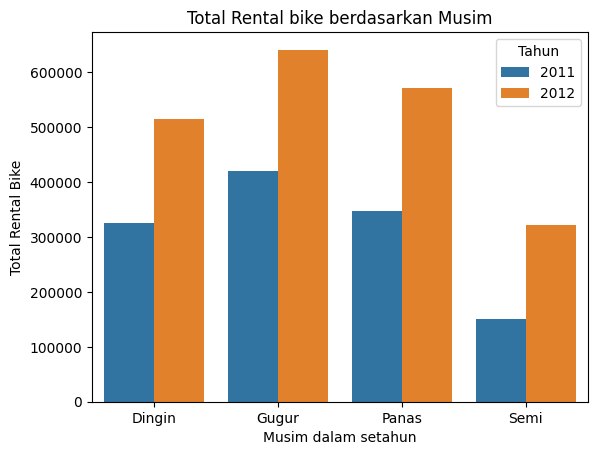

In [53]:
cnt_sum = all_df.groupby(['yr', 'season']).cnt.sum().reset_index()
sns.barplot(data=cnt_sum, x='season', y='cnt', hue='yr', errorbar=None)
plt.title('Total Rental bike berdasarkan Musim')
plt.xlabel('Musim dalam setahun')
plt.ylabel('Total Rental Bike')
plt.legend(title='Tahun')
plt.show()

### Pada jam / pukul berapa yang tercatat paling banyak User bike sharing setiap harinya di tahun 2012?

In [54]:
rental_hour_2012_df = all_df[all_df['yr'] == '2012']
most_hour_rental_2012_df = rental_hour_2012_df.groupby(['hr']).cnt.sum().sort_values(ascending=False).reset_index()
most_hour_rental_2012_df

,hr,cnt
0,17,209228
1,18,192787
2,8,165534
3,16,142126
4,19,140987
5,13,115580
6,12,115216
7,15,114559
8,14,109170
9,20,101732


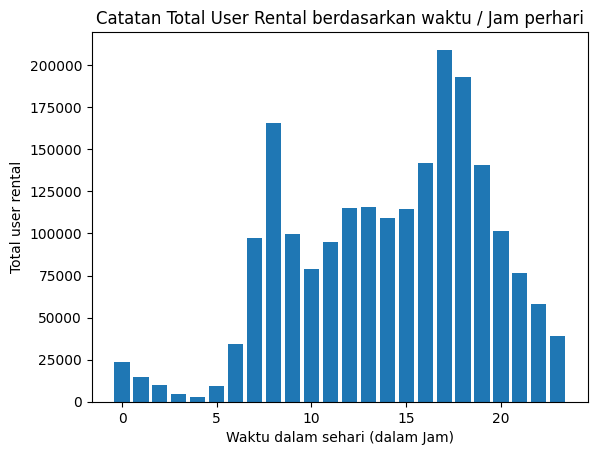

In [55]:
cnt_hour_sum_df = rental_hour_2012_df.groupby(['hr']).cnt.sum().reset_index()
plt.bar(cnt_hour_sum_df.hr, cnt_hour_sum_df.cnt)
plt.title('Catatan Total User Rental berdasarkan waktu / Jam perhari')
plt.ylabel('Total user rental')
plt.xlabel('Waktu dalam sehari (dalam Jam)')
plt.show()

### Bagaimana catatan user registered bike sharing setiap bulan pada tahun 2012?

In [56]:
rental_month_2012_df = all_df[all_df.yr == '2012']
rental_month_log_2012_df = rental_month_2012_df.groupby('mnth').registered.sum().sort_values(ascending=False).reset_index()
rental_month_log_2012_df

,mnth,registered
0,9,174795
1,8,171306
2,10,164303
3,7,161902
4,6,159536
5,5,151630
6,4,135768
7,3,133257
8,11,131655
9,12,110468


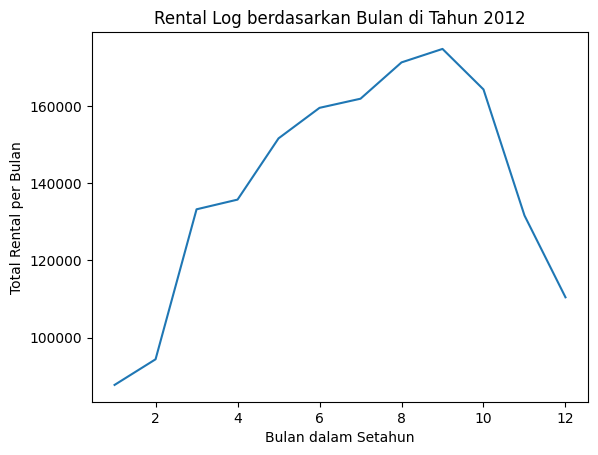

In [57]:
cnt_month_sum_df = rental_month_2012_df.groupby('mnth').registered.sum().reset_index()
sns.lineplot(data=cnt_month_sum_df ,x='mnth', y='registered', )
plt.title('Rental Log berdasarkan Bulan di Tahun 2012')
plt.ylabel('Total Rental per Bulan')
plt.xlabel('Bulan dalam Setahun')
plt.show()

### Bagaimana minat user terhadap rental sepeda jika dilihat dari factor suhu dan kelembapan?

In [58]:
rental_temp_df = all_df.groupby('temp_group').cnt.sum().sort_values(ascending=False).reset_index()
rental_temp_df

,temp_group,cnt
0,Sedang,1705933
1,Panas,857853
2,Dingin,728893


In [59]:
rental_hum_df = all_df.groupby('hum_group').cnt.sum().sort_values(ascending=False).reset_index()
rental_hum_df['hum_group'] = pd.Categorical(rental_hum_df['hum_group'], categories=rental_hum_df['hum_group'].unique(), ordered=True)
rental_hum_df

C:\Users\rahma\AppData\Local\Temp\ipykernel_18240\1143760190.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rental_hum_df = all_df.groupby('hum_group').cnt.sum().sort_values(ascending=False).reset_index()


,hum_group,cnt
0,Sedikit Lembab,1349575
1,Sedikit Kering,1249483
2,Lembab,608296
3,Kering,85325


C:\Users\rahma\AppData\Local\Temp\ipykernel_18240\1946368109.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rental_temp_df, x='cnt', y='temp_group', palette=temp_colors, ax=ax[0])
C:\Users\rahma\AppData\Local\Temp\ipykernel_18240\1946368109.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rental_hum_df, x='cnt', y='hum_group', palette=hum_colors, order=rental_hum_df['hum_group'].unique(), ax=ax[1])


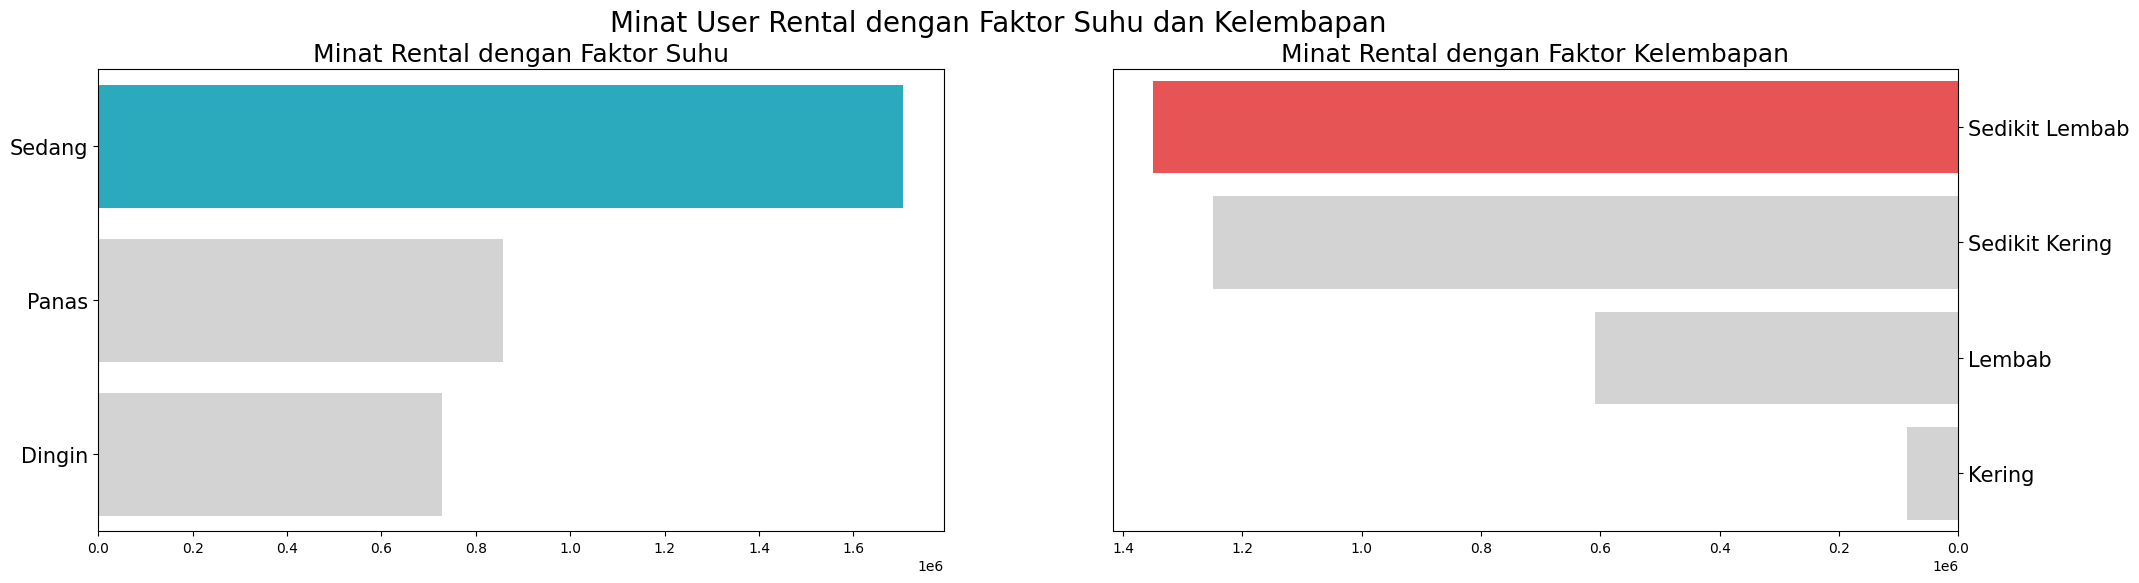

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

temp_colors = ['#12BCD4', '#D3D3D3', '#D3D3D3']
hum_colors = ['#FF3B3E', '#D3D3D3', '#D3D3D3', '#D3D3D3']

sns.barplot(data=rental_temp_df, x='cnt', y='temp_group', palette=temp_colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('Minat Rental dengan Faktor Suhu', loc='center', fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

sns.barplot(data=rental_hum_df, x='cnt', y='hum_group', palette=hum_colors, order=rental_hum_df['hum_group'].unique(), ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title('Minat Rental dengan Faktor Kelembapan', loc='center', fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle('Minat User Rental dengan Faktor Suhu dan Kelembapan', fontsize=20)
plt.show()


**Insight**
- Untuk menjawab ke 4 pertanyaan yang telah dibuat, diperlukan visualisasi data yang berbeda beda
- Masing masing memiliki fungsi nya tersendiri dan bisa juga 1 pertanyaan ditampilkan dengan visualisasi yang lain

## Analisis Lanjutan
- Teknik Analisis yang digunakan adalah Clustering, yaitu Manual Grouping dan Binning
- Teknik Manual Grouping digunakan untuk mengelompokan Total User Rental, misal pada setiap bulan pada tahun tertentu. Selain itu, teknik ini juga digunakan untuk melakukan pengelompokan Bulan Bulan dalam setahun ke dalam kategori Musim yaitu, Dingin, Gugur, Semi, dan Panas
- Teknik Binning digunakan untuk membagi fitur Suhu dan juga fitur Kelembapan. Fitur kelembapan dibagi menjadi 3 tingkatan yaitu Panas, Sedang, dan Dingin. Lalu fitur Kelembapan dibagi menjadi 4 tingkatan yaitu Kering, Sedikit Kering, Sedikit Lembap, dan Lembap

## Conclusion

- Conclusion Pertanyaan 1 :
> Jika dilihat dari visualisasi yang digunakan untuk menampilkan banyaknya (total) User Rental Bike pada setiap Musim di tahun 2011 maupun 2012. Dapat disimpulkan bahwa Musim yang memiliki User Rental terbanyak baik di tahun 2011 maupun 2012 adalah Musim Gugur.
Ini berarti para Perental lebih banyak bersepeda di Musim Gugur

- Conclusion Pertanyaan 2 :
> Dilihat dari visualisasi yang digunakan untuk menampilkan Total User Rental berdasarkan Waktu / Jam dalam satu hari, yang berarti dari Pukul 00:00 sampai Pukul 23:00 di tahun 2012. Dapat disimpulkan bahwa paling banyak User Rental yaitu pada Pukul 17:00.
Ini berarti para Perental mayoritas lebih suka bersepeda di sore hari untuk, kemungkinan untuk melepas stress setelah bekerja

- Conclusion Pertanyaan 3:
> Dengan melihat visualisasi terkait Log / History Rental tahun 2012 pada setiap bulannya, dimana 1 mewakili bulan Januari dan 12 mewakili Desember. Didapatkan bahwa pada awal tahun sampai Q1 (Kuartil 1) terdapat peningkatan yang cukup pesat di akhir Q1. Lalu saat Q2 atau bulan 4 sampai 6, Usernya jumlah total Rental semakin naik walaupun tidak terlalu pesat. Puncaknya pada Q3, tepatnya di bulan 9 yang memiliki total 174795 User Rental. Terakhir pada Q4 atau akhir tahun, jumlahnya menurun.
Ini berarti banyak orang yang menjadi User Bike Rental pada Q3 tahun 2012, yaitu pada bulan 7, 8, dan 9, atau bulan Juli, Agustus, dan September

- Conclusion Pertanyaan 4:
> Dengan mempertimbangkan faktor suhu dan kelembapan pada kehidupan sehari - hari, dilihat dari hasil visualisasi kedua faktor tersebut, dapat diambil kesimpulan bahwa User Rental paling banyak saat Suhu lingkungan berada di kategori Sedang. Dimana kategori Sedang jika dihitung kembali didapatkan rentang suhu 17 °C sampai 28 °C. Lalu untuk faktor kelembapan, User Rental paling banyak saat keadaan lingkungan Sedikit Lembap atau pada retang nilai kelembapan 25 - 50 (maksimal 100).
Dari kedua faktor di atas, berarti User Rental lebih suka keadaan lingkungan yang memiliki suhu agak dingin dan suhu ruangan, serta kelembapan yang agak rendah